In [1]:
print('SLEEP DIARY')

SLEEP DIARY


In [2]:
print('Inserire il nome del file excel contenente i dati:')
n=input()

Inserire il nome del file excel contenente i dati:
Sleep dataset 2020.xlsx


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dt
import datetime
from datetime import datetime
dati=pd.read_excel(n)
dati.drop(0,inplace=True)
dati.head()

,Data,Ieri ha fatto un sonnellino di durata (minuti totali)?,A che ora è andato a letto ieri sera?,A che ora ha spento la luce per dormire?,"Dallo spegnimento della luce, in quanto tempo si è addormentato?",Orario previsto del risveglio questa mattina?,Qual è stato l'orario del risveglio finale questa mattina?,A che ora si è alzato dal letto?,Quante volte si è svegliato/a durante la notte? (0 se non si è svegliato/a),Quanti minuti in totale è rimasto/a sveglio/a nel corso della notte?,"Quanto è stato disturbato il suo sonno la notte scorsa? (1=per niente, 10=moltissimo)","Qualità del sonno la scorsa notte (1=molto scarso, 10=molto buono)","Livello di affaticamento di ieri (1=niente, 10=estremamente stancante)","Livello di sonnolenza di ieri (1=per niente, 10=estremamente sonnolento)",(polar)\nDaily activity goal,(polar)\nActual sleep,(polar)\nSleep continuity
1,2020-01-01 00:00:00,90,01:05:00,01:08:00,5,08:30:00,08:12:00,08:12:00,4,20,6,5,4,2,0.73,0.90,1.6
2,2020-01-02 00:00:00,0,23:02:00,23:51:00,5,07:30:00,07:30:00,07:30:00,0,0,1,7,2,1,0.90,0.96,4.8
3,2020-01-03 00:00:00,0,00:28:00,00:45:00,4,07:00:00,07:50:00,07:55:00,2,2,1,7,3,2,0.81,0.93,2.7
4,2020-01-04 00:00:00,0,22:55:00,00:03:00,10,06:00:00,06:00:00,06:00:00,0,0,1,7,6,1,1.99,0.93,2.8
5,2020-01-05 00:00:00,0,23:00:00,23:29:00,4,07:00:00,07:00:00,07:00:00,3,15,5,5,6,3,0.96,0.93,2.6


In [4]:
data_mix=np.array(dati.iloc[:,0])
data=np.array(data_mix)
for i in range(0,dati.shape[0],1):
    if(type(data_mix[i])==datetime):
        data[i]=data_mix[i].date()
    elif(type(data_mix[i])==str):
        data[i]=datetime.strptime(data_mix[i],"%d/%m/%y")
        data[i]=data[i].date()

Text(0.5, 0, 'Giorno')

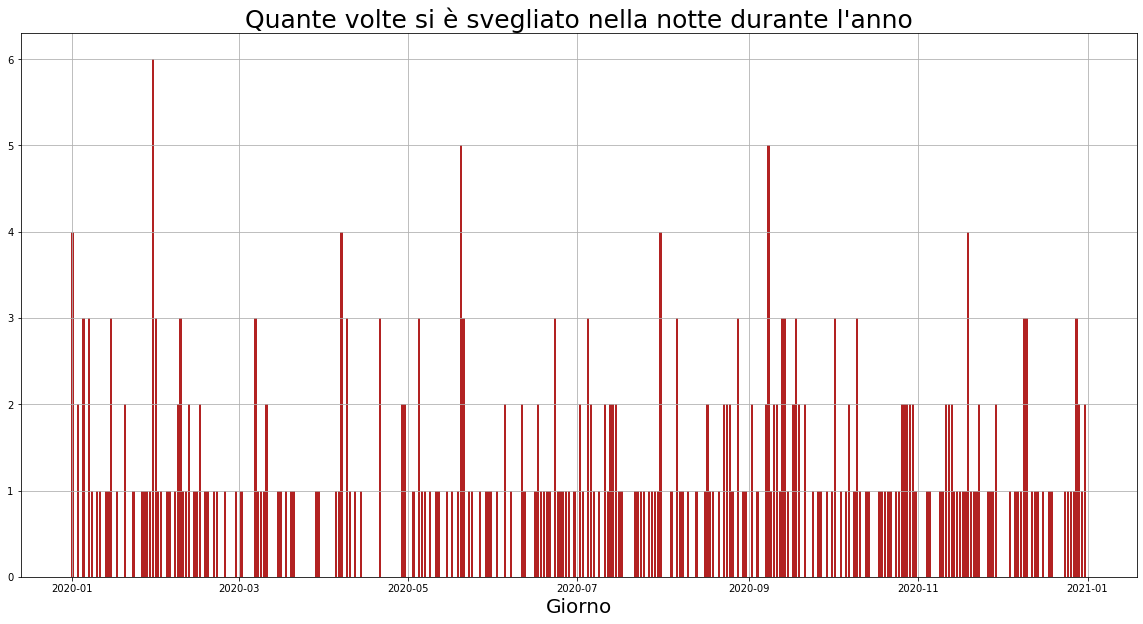

In [5]:
t_w=np.array(dati.iloc[:,8])
plt.figure(figsize=(20,10))
plt.grid()
plt.bar(data,t_w,color='firebrick')
plt.title("Quante volte si è svegliato nella notte durante l'anno",fontsize=25)
plt.xlabel('Giorno',fontsize=20)

Text(0.5, 0, 'Giorno')

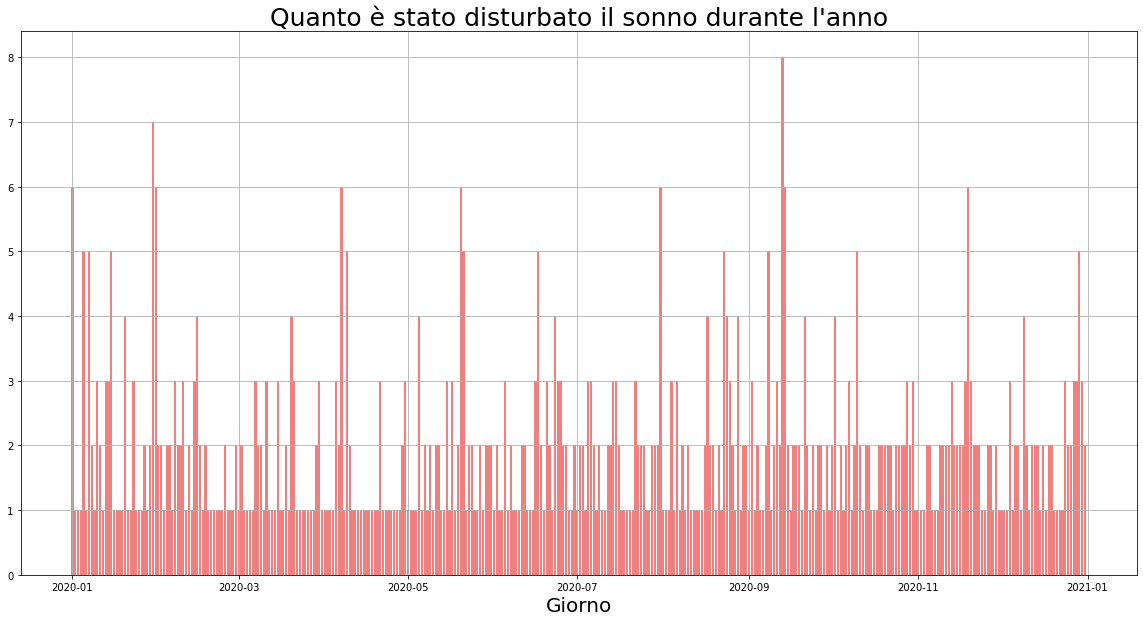

In [6]:
d_s=np.array(dati.iloc[:,10])
plt.figure(figsize=(20,10))
plt.grid()
plt.bar(data,d_s,color='lightcoral')
plt.title("Quanto è stato disturbato il sonno durante l'anno",fontsize=25)
plt.xlabel('Giorno',fontsize=20)


Text(0.5, 0, 'Giorno')

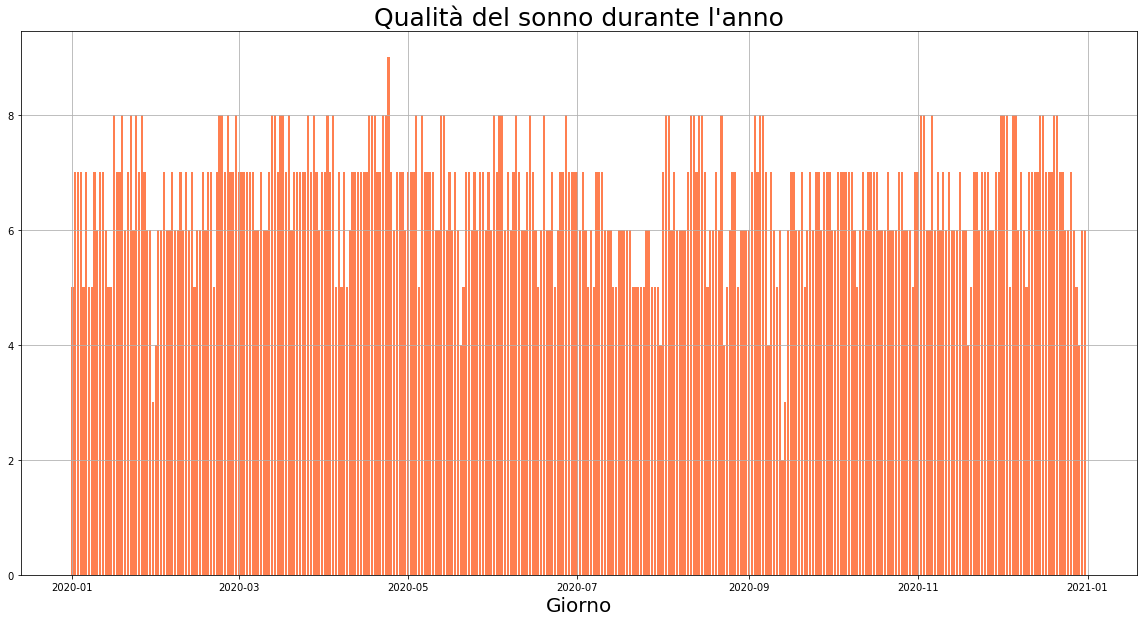

In [7]:
q_s=np.array(dati.iloc[:,11])
plt.figure(figsize=(20,10))
plt.grid()
plt.bar(data,q_s,color='coral')
plt.title("Qualità del sonno durante l'anno",fontsize=25)
plt.xlabel('Giorno',fontsize=20)

Text(0.5, 0, 'Giorno')

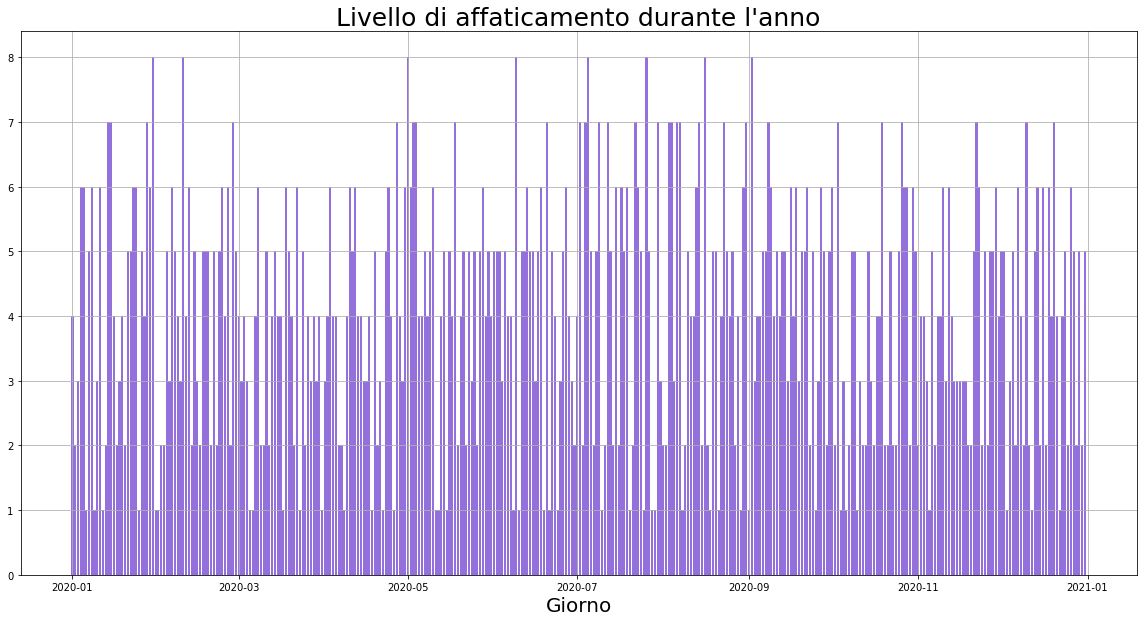

In [8]:
a=np.array(dati.iloc[:,12])
plt.figure(figsize=(20,10))
plt.grid()
plt.bar(data,a,color='mediumpurple')
plt.title("Livello di affaticamento durante l'anno",fontsize=25)
plt.xlabel('Giorno',fontsize=20)

Text(0.5, 0, 'Giorno')

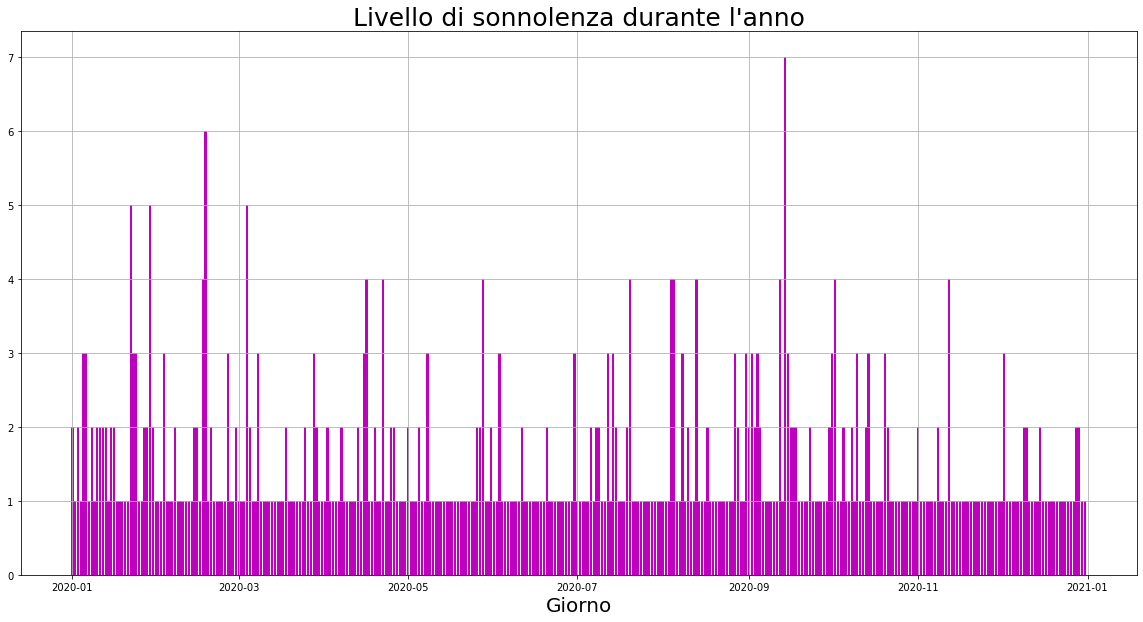

In [9]:
sonnolenza=np.array(dati.iloc[:,13])
plt.figure(figsize=(20,10))
plt.grid()
plt.bar(data,sonnolenza,color='m')
plt.title("Livello di sonnolenza durante l'anno",fontsize=25)
plt.xlabel('Giorno',fontsize=20)

Text(0.5, 0, 'Giorno')

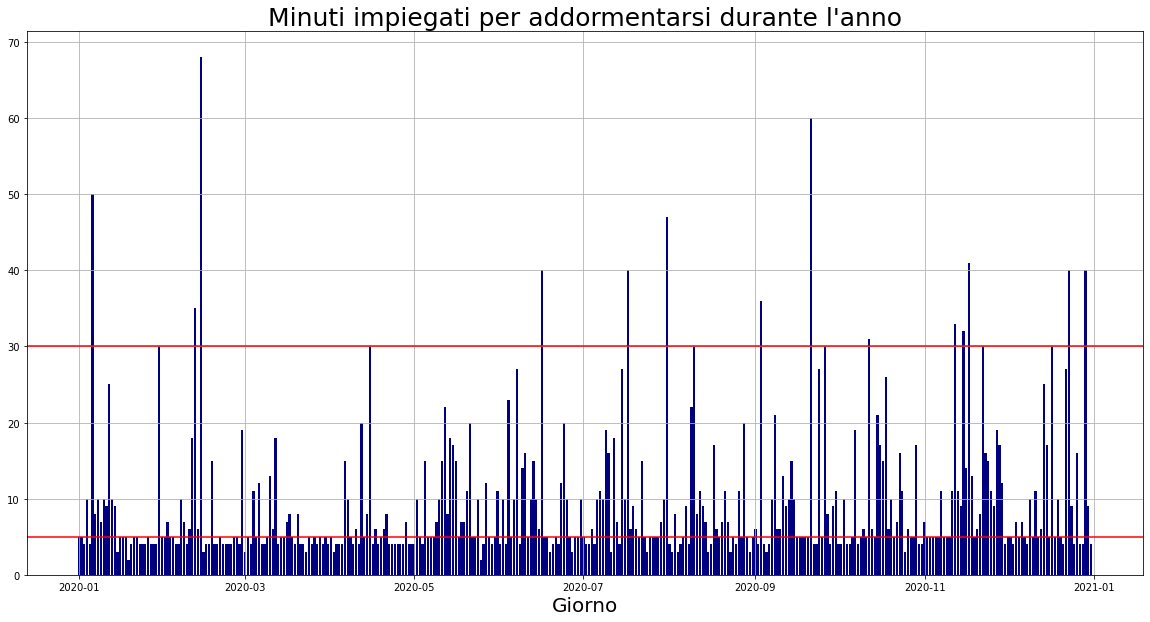

In [10]:
min_addormentamento=np.array(dati.iloc[:,4])
plt.figure(figsize=(20,10))
plt.grid()
plt.bar(data,min_addormentamento,color='navy')
plt.axhline(y=30, color='red')
plt.axhline(y=5, color='red')
plt.title("Minuti impiegati per addormentarsi durante l'anno",fontsize=25)
plt.xlabel('Giorno',fontsize=20)

In [11]:
h_spenta=np.array(dati.iloc[:,3])
min_addormentamento=np.array(dati.iloc[:,4])
orario_addormentamento=np.array(h_spenta)
for i in range(0,dati.shape[0],1):
    if(min_addormentamento[i]+h_spenta[i].minute<60):
        orario_addormentamento[i]=orario_addormentamento[i].replace(minute=h_spenta[i].minute+min_addormentamento[i])
    elif(min_addormentamento[i]+h_spenta[i].minute>=60 and h_spenta[i].hour+(min_addormentamento[i]//60)<24):
        orario_addormentamento[i]=orario_addormentamento[i].replace(hour=h_spenta[i].hour+(min_addormentamento[i]//60),minute=min_addormentamento[i]%60)
    elif(min_addormentamento[i]+h_spenta[i].minute>=60 and h_spenta[i].hour+(min_addormentamento[i]//60)>=24):
        orario_addormentamento[i]=orario_addormentamento[i].replace(hour=0,minute=min_addormentamento[i]%60)

datetime_addormentamento=np.array(orario_addormentamento)  
for i in range(0,dati.shape[0],1):
    if (orario_addormentamento[i].hour<=12):
        datetime_addormentamento[i]=datetime.combine(data[i+1],orario_addormentamento[i])
    elif(orario_addormentamento[i].hour>12):
        datetime_addormentamento[i]=datetime.combine(data[i],orario_addormentamento[i])
    #print(datetime_addormentamento[i])

In [12]:
ora_risveglio=np.array(dati.iloc[:,6])
datetime_risveglio=np.array(dati.iloc[:,6])
import datetime
for i in range(0,dati.shape[0],1):
    data2=datetime.timedelta(days=1)+data[i]
    datetime_risveglio[i]=datetime.datetime.combine(data2,ora_risveglio[i])
    #print(datetime_risveglio[i])

In [13]:
ore_sonno=datetime_risveglio-datetime_addormentamento
format_ore="%H.%M"
for i in range(0,dati.shape[0],1):
    ore_sonno[i]=str(ore_sonno[i])
    ore_sonno[i]=datetime.datetime.strptime(ore_sonno[i],"%H:%M:%S")
    ore_sonno[i]=ore_sonno[i].time()
    ore_sonno[i]=ore_sonno[i].strftime(format_ore)
    ore_sonno[i]=float(ore_sonno[i])


(0.0, 10.0)

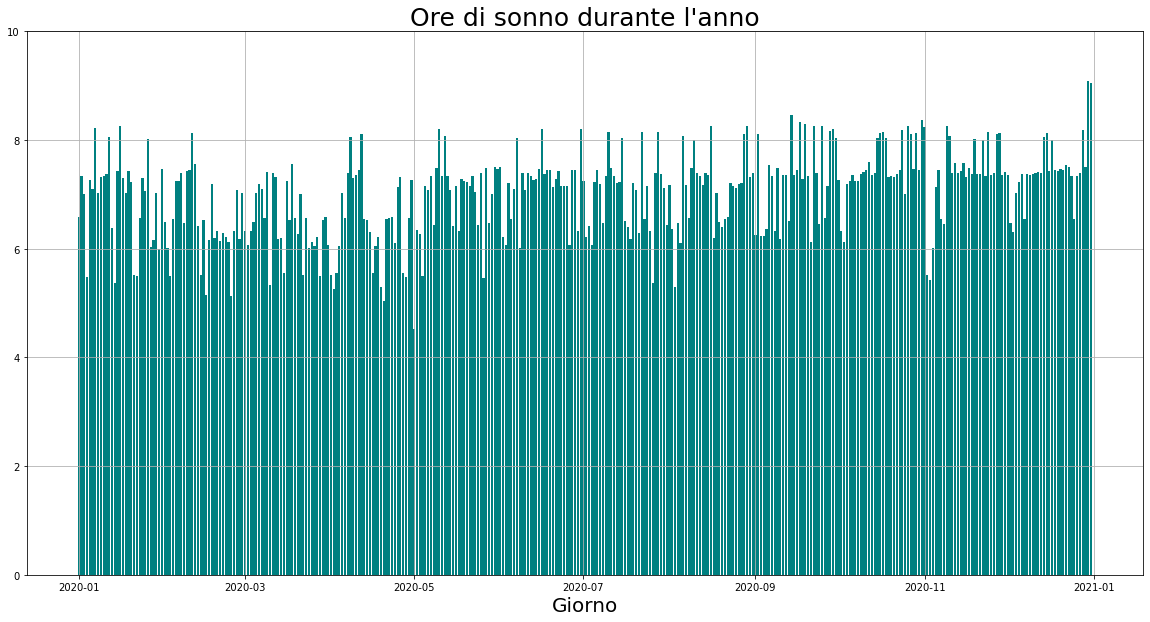

In [14]:
plt.figure(figsize=(20,10))
plt.grid()
plt.bar(data,ore_sonno,color='teal')
plt.title("Ore di sonno durante l'anno",fontsize=25)
plt.xlabel('Giorno',fontsize=20)
plt.ylim(0,10)

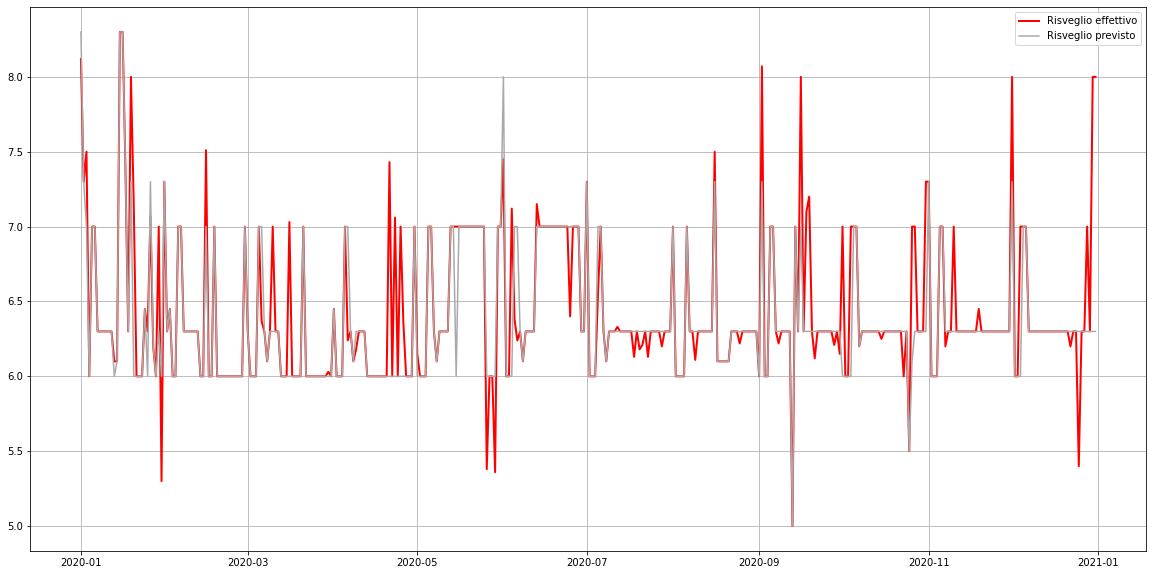

In [15]:
risveglio_previsto=np.array(dati.iloc[:,5])
for i in range(0,dati.shape[0],1):
    risveglio_previsto[i]=risveglio_previsto[i].strftime(format_ore)
    risveglio_previsto[i]=float(risveglio_previsto[i])
risveglio_effettivo=np.array(dati.iloc[:,6]) 
for i in range(0,dati.shape[0],1):
    risveglio_effettivo[i]=risveglio_effettivo[i].strftime(format_ore)
    risveglio_effettivo[i]=float(risveglio_effettivo[i])
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(data,risveglio_effettivo,color='red',label='Risveglio effettivo',linewidth=2)
plt.plot(data,risveglio_previsto,color='darkgrey',label='Risveglio previsto')
plt.legend()

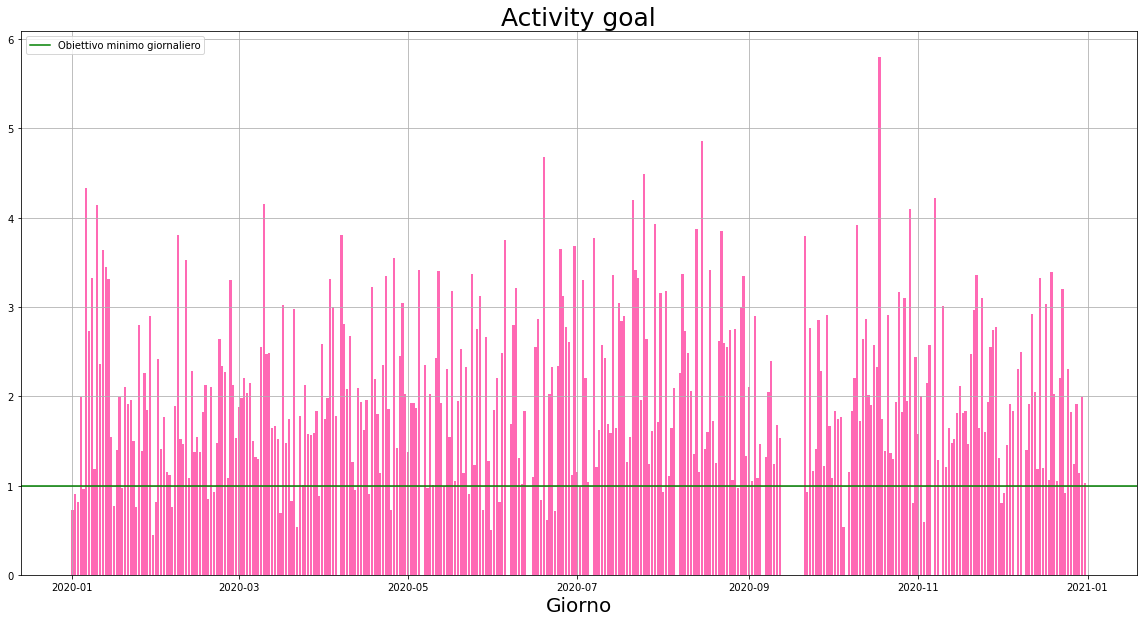

In [16]:
activity_goal=np.array(dati.iloc[:,14])
plt.figure(figsize=(20,10))
plt.grid()
plt.bar(data,activity_goal,color='hotpink')
plt.axhline(y=1, color='green',label='Obiettivo minimo giornaliero')
plt.title("Activity goal",fontsize=25)
plt.xlabel('Giorno',fontsize=20)
plt.legend()

Text(0.5, 0, 'Giorno')

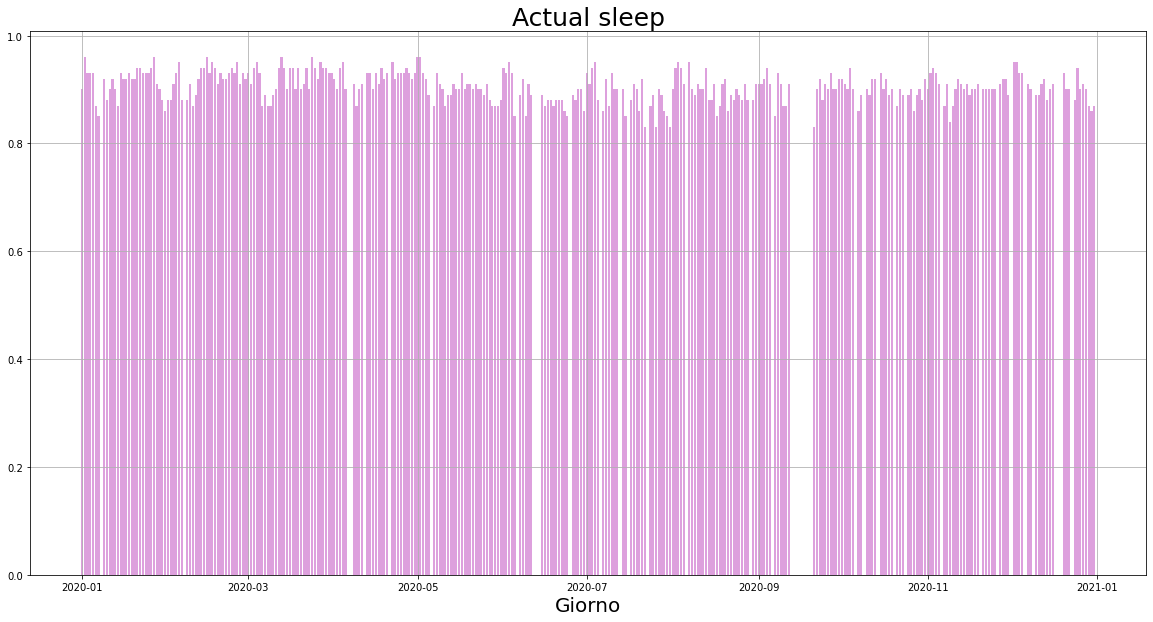

In [17]:
actual_sleep=np.array(dati.iloc[:,15])
plt.figure(figsize=(20,10))
plt.grid()
plt.bar(data,actual_sleep,color='plum')
plt.title("Actual sleep",fontsize=25)
plt.xlabel('Giorno',fontsize=20)

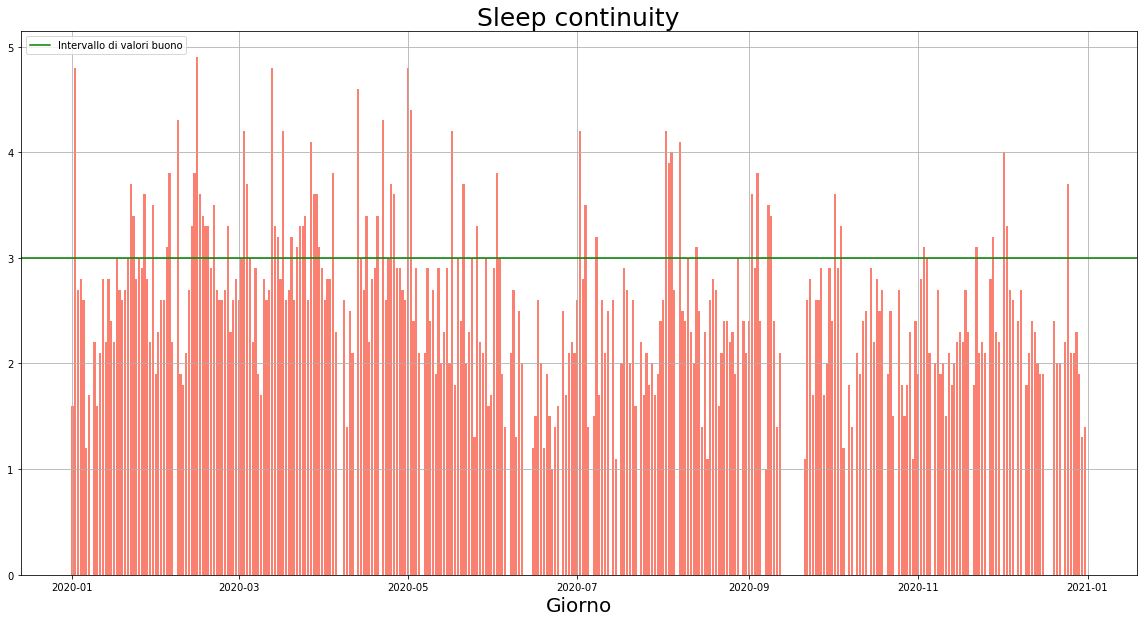

In [19]:
sleep_continuity=np.array(dati.iloc[:,16])
plt.figure(figsize=(20,10))
plt.grid()
plt.bar(data,sleep_continuity,color='salmon')
plt.axhline(y=3, color='green',label='Intervallo di valori buono')
plt.title("Sleep continuity",fontsize=25)
plt.xlabel('Giorno',fontsize=20)
plt.legend()